In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import *

import snowballstemmer
import nltk
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

PATH = os.getcwd()

nltk.download("stopwords")

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

[nltk_data] Downloading package stopwords to /Users/js/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data
Load and inspect shape of data (rows, columns)

In [2]:
df_raw = pd.read_csv(f'{PATH}/data/Airline-Sentiment-2-w-AA.csv', encoding='ISO-8859-1')

Estimate sentiment using VADER toolkit _(this might take a moment)_

In [3]:
analyser = SentimentIntensityAnalyzer()
neutral_size = 0.5

def get_sentiment(x):
    compound = analyser.polarity_scores(x)['compound']
    if (compound > neutral_size / 2): return 'positive'
    elif (compound < -(neutral_size / 2)): return 'negative'
    else: return 'neutral'

df_raw['sentiment'] = df_raw['text'].map(get_sentiment)

### Sentiment per Airline

In [4]:
df_as = df_raw[['airline', 'sentiment']].copy()
df_as.sample(5)

,airline,sentiment
14348,American,neutral
1540,United,positive
3723,United,positive
2824,United,negative
9208,US Airways,negative


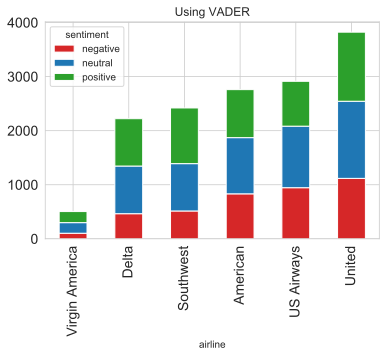

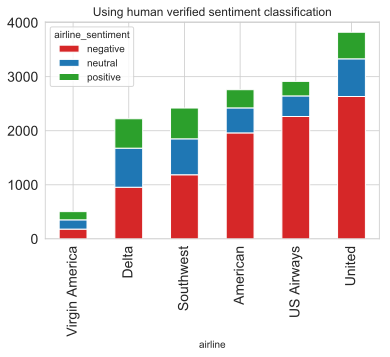

In [5]:
df_as = df_raw[['airline', 'sentiment']].copy()
df_as = df_as.groupby(['airline','sentiment']).size()
df_as_sort = df_as.groupby(level=0).sum().sort_values(ascending=True)
df_as.reindex(index=df_as_sort.index, level=0).unstack().plot(kind='bar', stacked=True, color=['C3', 'C0', 'C2'])
plt.title('Using VADER')
plt.show()

df_as = df_raw[['airline', 'airline_sentiment']].copy()
df_as = df_as.groupby(['airline','airline_sentiment']).size()
df_as_sort = df_as.groupby(level=0).sum().sort_values(ascending=True)
df_as.reindex(index=df_as_sort.index, level=0).unstack().plot(kind='bar', stacked=True, color=['C3', 'C0', 'C2'])
plt.title('Using human verified sentiment classification')
plt.show()